In [73]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib inline

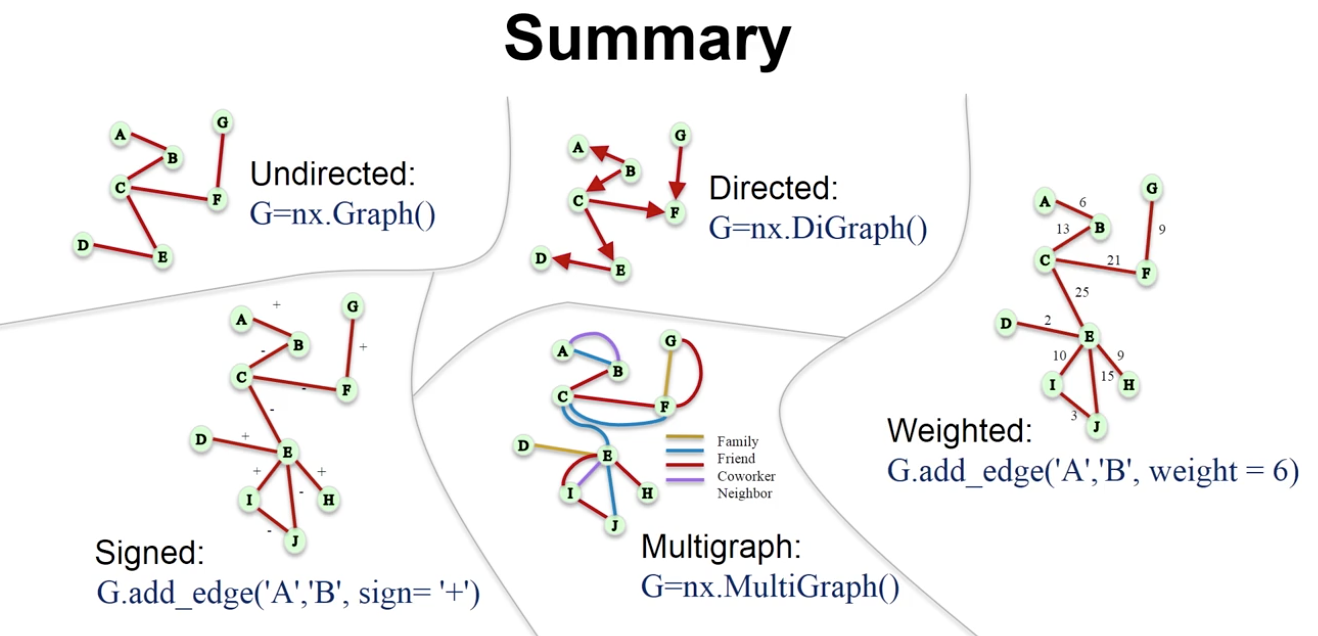

In [2]:
# Undirected
G = nx.Graph()
G.add_edge('A','B')
G.add_edge('B','C')

In [3]:
# Directed network
G = nx.DiGraph()
G.add_edge('B','A')
G.add_edge('B','C')

In [ ]:
# Nodes: People
# Edges: Fridenship
# Symmetric relationship (Undirected network)

# Nodes: Birds
# Edges: Eat
# Asymmetric relationship (Directed network)

In [ ]:
# Weighted Networks
# Some edges carry higher weight than others

# Signed Networks (+/-) with positive/negative sign
G = nx.Graph()
G.add_edge('A','B',sign='+')
G.add_edge('B','C',sign='-')

In [ ]:
# Other edge attirbutes or labels 
G = nx.Graph()
G.add_edge('A','B',relation='friend') # Family|Friend|Coworker|Neighbor

In [ ]:
# Multigraphs, a pair of nodes can have different types of relationships simultaneously
G = nx.MultiDiGraph()
G.add_edge('A','B',relation='friend')
G.add_edge('A','B',relation='family')

# Node and Edge Attributes

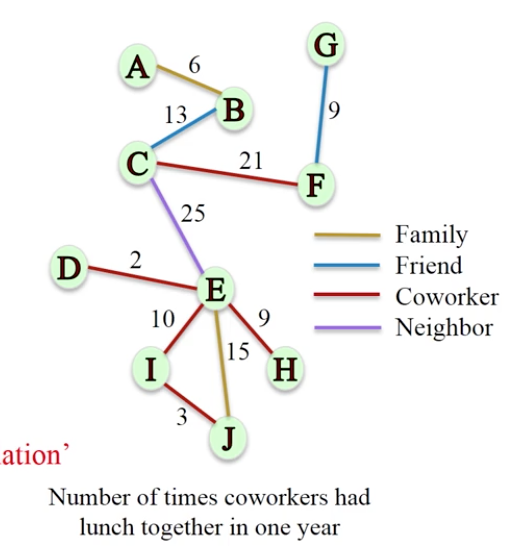

In [5]:
G = nx.Graph()
G.add_edge('A','B',weight=6, relation='family')
G.add_edge('B','C',weight=13, relation='friend')

In [6]:
G.edges() # list of all edges

EdgeView([('A', 'B'), ('B', 'C')])

In [8]:
G.edges(data=True) # list of all edges with attributes

EdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family'}), ('B', 'C', {'weight': 13, 'relation': 'friend'})])

In [9]:
G.edges(data='relation') # list of all edges with attribute 'relation'

EdgeDataView([('A', 'B', 'family'), ('B', 'C', 'friend')])

In [19]:
G['A']['B'] # dictionary of attributes of edge (A,B)

{'relation': 'family', 'weight': 6}

In [20]:
G['B']['C']['weight']

13

In [22]:
G['C']['B']['weight'] # undirected graph, order does not matter

13

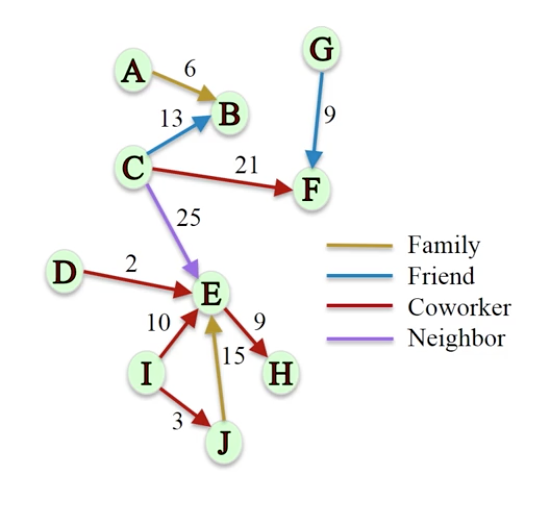

In [23]:
# directed, weighted network:
G = nx.DiGraph()
G.add_edge('A','B',weight=6,relation='family')
G.add_edge('C','B',weight=13,relation='friend')

In [24]:
G['C']['B']['weight']

13

In [26]:
#G['B']['C']['weight'] # directed graph, order matters

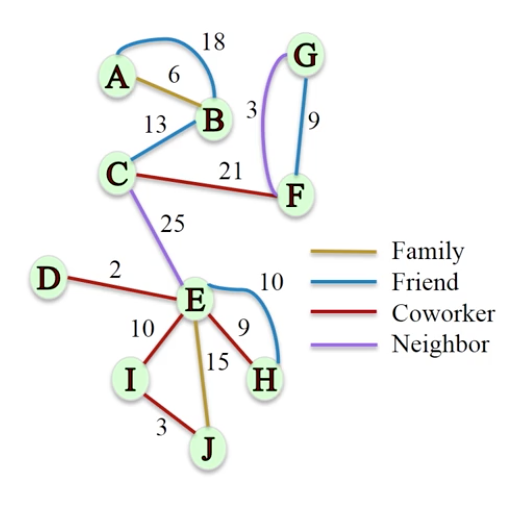

In [28]:
# MultiGraph:
G = nx.MultiGraph()
G.add_edge('A','B',weight=6,relation='family')
G.add_edge('A','B',weight=18, relation='friend')
G.add_edge('C','B',weight=13, relation='friend')

0

In [29]:
G['A']['B'] # One dictionary of attributes per(A,B) edge

AtlasView({0: {'weight': 6, 'relation': 'family'}, 1: {'weight': 18, 'relation': 'friend'}})

In [30]:
G['A']['B'][0]['weight'] # undirected graph, order does not matter

6

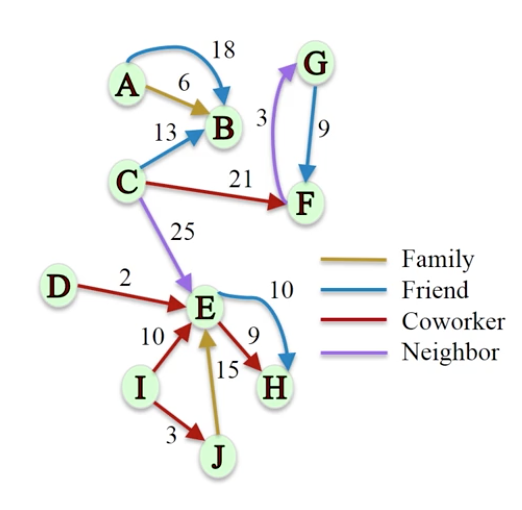

In [32]:
# Directed MultiGraph:
G = nx.MultiDiGraph()
G.add_edge('A','B',weight=6,relation='family')
G.add_edge('A','B',weight=18,relation='friend')
G.add_edge('C','B',weight=13,relation='friend')

0

In [33]:
G['A']['B'][0]['weight']

6

In [34]:
# Node Attirbutes in Network X

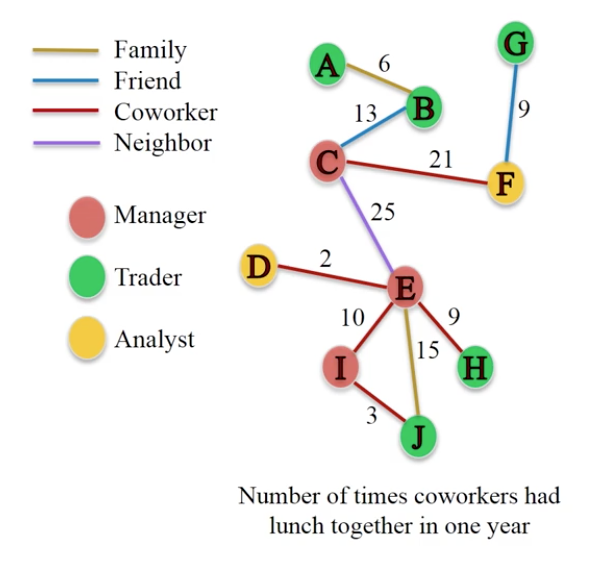

In [35]:
G = nx.Graph()
G.add_edge('A','B',weight=6,relation='family')
G.add_edge('C','C',weight=13,relation='friend')

In [37]:
G.add_node('A',role='trader')
G.add_node('B',role='trader')
G.add_node('C',role='manager')

In [39]:
G.nodes() # list of all nodes

NodeView(('A', 'B', 'C'))

In [40]:
G.nodes(data=True) # list of all nodes with attributes

NodeDataView({'A': {'role': 'trader'}, 'B': {'role': 'trader'}, 'C': {'role': 'manager'}})

In [42]:
G.node['A']['role']

'trader'

# Bipartite Graphs

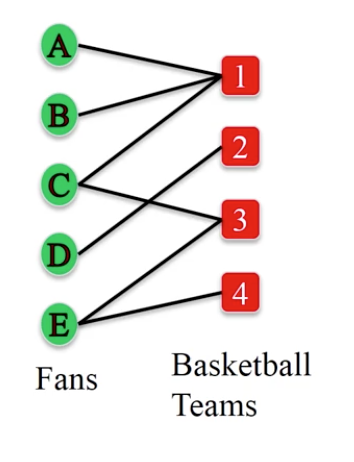

In [43]:
from networkx.algorithms import bipartite

In [62]:
B = nx.Graph() # No separate class for bipartite graphs
B.add_nodes_from(['A','B','C','D','E'],bipartite=0) 
# label one set of nodes 0
B.add_nodes_from([1,2,3,4],bipartite=1)
# label other set of nodes 1
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',2),
                  ('E',3),('E',4)])

In [63]:
bipartite.is_bipartite(B)

True

In [59]:
B.add_edge('A','B')

In [47]:
bipartite.is_bipartite(B)

False

In [48]:
B.remove_edge('A','B')

In [49]:
X = set([1,2,3,4])

In [50]:
bipartite.is_bipartite_node_set(B,X)

True

In [51]:
X=set(['A','B','C','D','E'])
bipartite.is_bipartite_node_set(B,X)

True

In [53]:
X=set([1,2,3,4,'A'])
bipartite.is_bipartite_node_set(B,X)

False

In [65]:
#bipartite.sets(B)

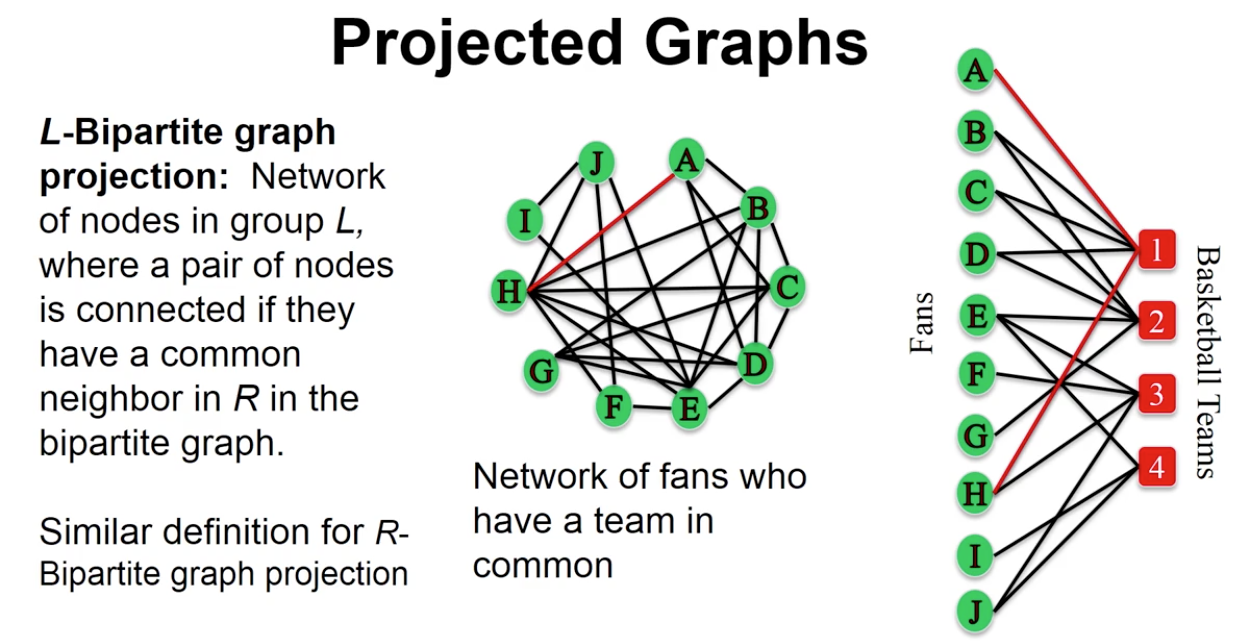

In [66]:
B = nx.Graph()
B.add_edges_from([
    ('A',1),('B',1),('C',1),('D',1),('H',1),
    ('B',2),('C',2),('D',2),('E',2),('G',2),
    ('F',3),('H',3),('J',3),('E',4),('I',4),('J',4)
])

In [67]:
X=set(['A','B','C','D','E','F','G','H','I','J'])

In [68]:
P = bipartite.projected_graph(B,X)

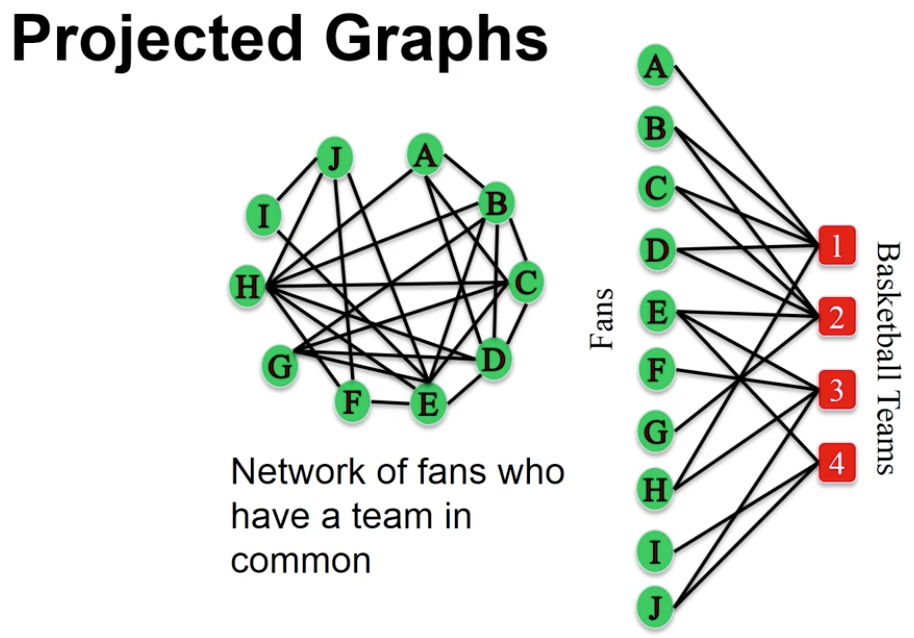

In [70]:
X = set([1,2,3,4])
P = bipartite.projected_graph(B,X)

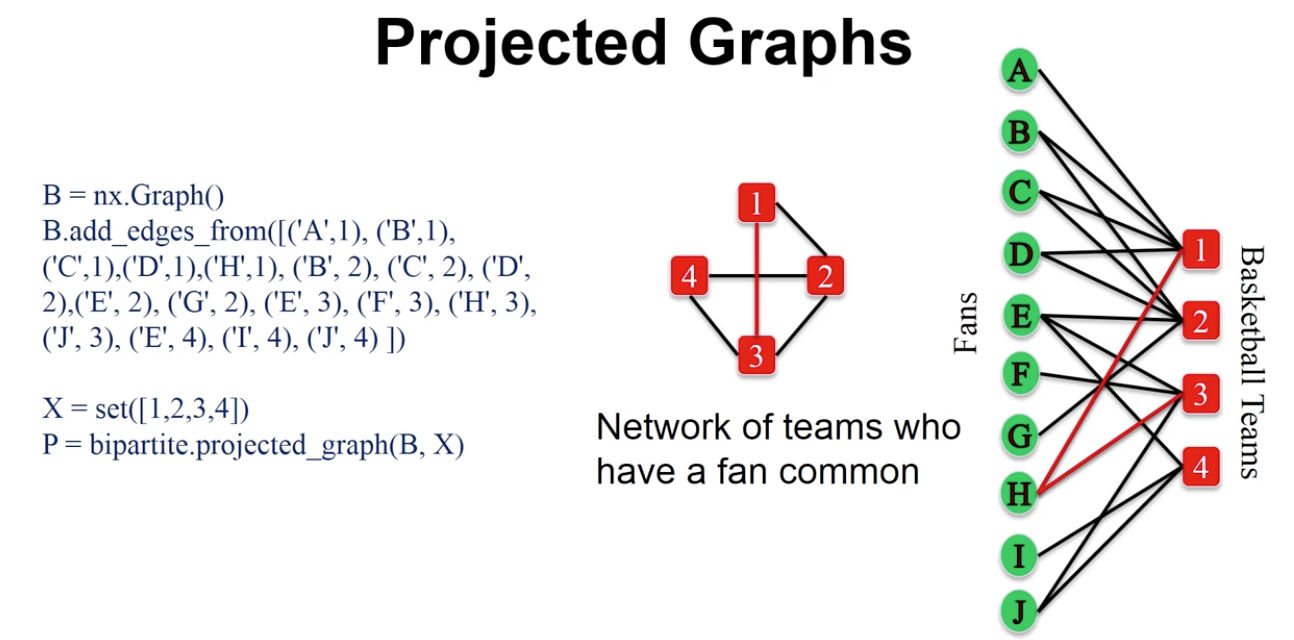

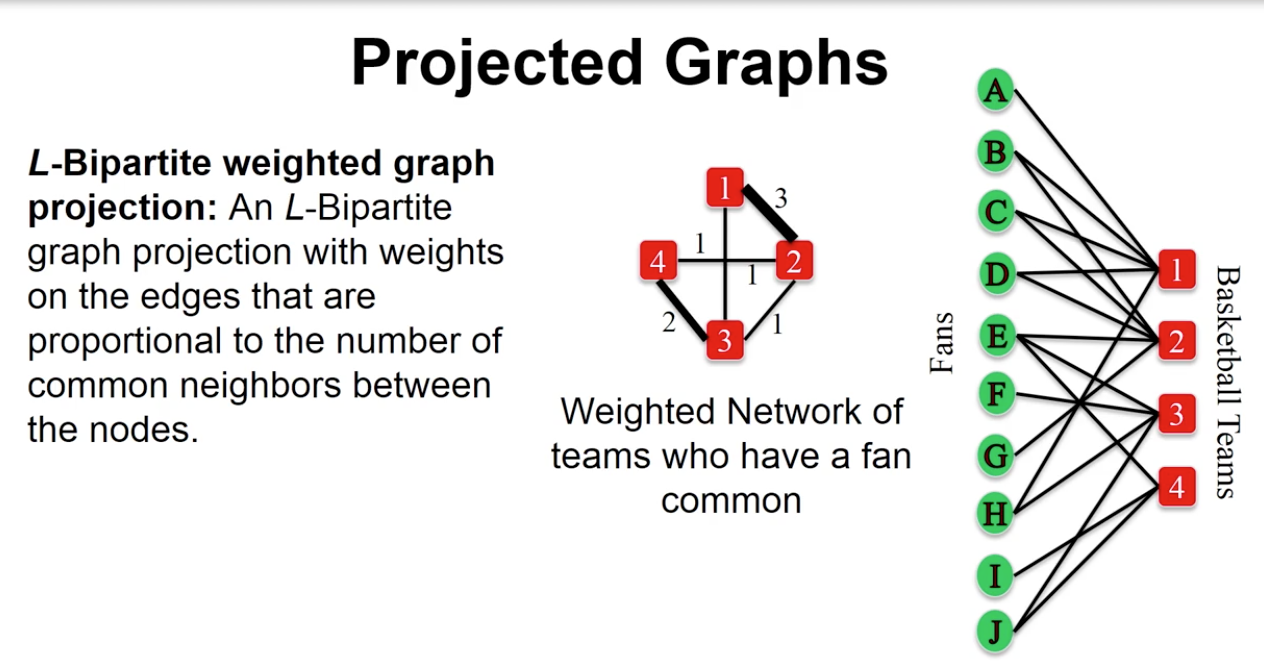

In [71]:
X = set([1,2,3,4])
P = bipartite.weighted_projected_graph(B,X)

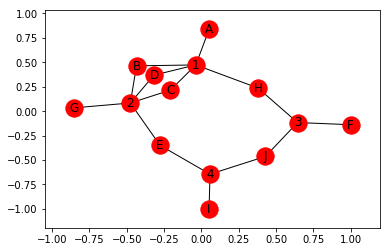

In [76]:
nx.draw_networkx(B)

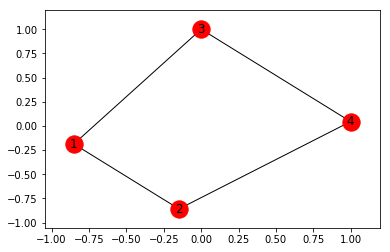

In [74]:
nx.draw_networkx(P)